#### 作业目的：

    理解频域处理与空间域处理的等效关系与步骤，掌握频域相乘与空间域循环卷积之间的对等关系，理解DFT运算中补零的效果。

#### 作业内容：

（1）对附件中的两幅图像分别进行DFT，以log(1+abs(f))形式显示信号频谱。

        从空域观察：两张图片中并没有明显的水平和垂直边缘，但从图像频谱显示其包含有强烈的水平与垂直分量，请分析其原因，提出相应的解决办法并进行验证。

（2）选一张灰度图像，然后顺序进行下列处理操作：  

        A.对(x,y)位置上的像素值乘以(-1)(x+y )

        B.计算图像二维DFT

        C.对二维DFT的值取共轭

        D.对共轭后的频谱做IDFT运算

        E.对IDFT的结果取实部

        F.对实部乘以(-1)(x+y)

        与原始图像进行对比，从理论上分析为什么会出现这种结果。



### （1）对附件中的两幅图像分别进行DFT，以log(1+abs(f))形式显示信号频谱。

##### 第一幅图像 DFT，以log(1+abs(f))形式显示信号频谱。

(-0.5, 303.5, 303.5, -0.5)

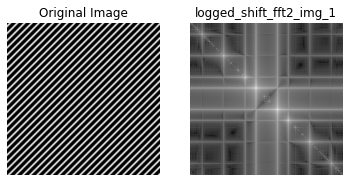

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import scipy.signal as signal
from scipy.fftpack import fft, ifft
import copy

img_1 = io.imread('img/lines.png')
fft2_1 = np.fft.fft2(img_1)
shift_fft2_1 = np.fft.fftshift(fft2_1)

log_shift_fft2_1 = np.log(1 + np.abs(shift_fft2_1))
plt.subplot(1,2,1)
plt.imshow(img_1,'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(log_shift_fft2_1,'gray')
plt.title('logged_shift_fft2_img_1')
plt.axis('off')

##### 第二幅图像 DFT，以log(1+abs(f))形式显示信号频谱。

(-0.5, 255.5, 255.5, -0.5)

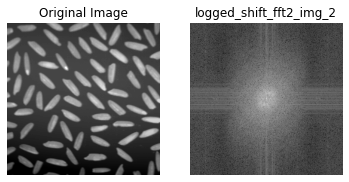

In [30]:
img_2 = io.imread('img/rice.tif')
fft2_2 = np.fft.fft2(img_2)
shift_fft2_2 = np.fft.fftshift(fft2_2)



plt.subplot(1,2,1)
plt.imshow(img_2,'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
log_shift_fft2_2 = np.log(1 + np.abs(shift_fft2_2))
plt.imshow(log_shift_fft2_2,'gray')
plt.title('logged_shift_fft2_img_2')
plt.axis('off')

### （2）选一张灰度图像，然后顺序进行下列处理操作： 

    选取的图片

(4032, 3024, 4)
Lossy conversion from float64 to uint8. Range [0.0, 65.535]. Convert image to uint8 prior to saving to suppress this warning.


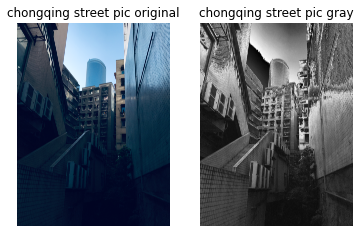

In [31]:
chongqing= io.imread('img/chongqing.png')


print(chongqing.shape)
plt.subplot(1,2,1)
plt.imshow(chongqing)
plt.title('chongqing street pic original')
plt.axis('off')
plt.subplot(1,2,2)

chongqing_gray= (chongqing[:,:,0]*299 + chongqing[:,:,1]*587 + chongqing[:,:,2]*114 + 500) / 1000
plt.imshow(chongqing_gray,'gray')
plt.title('chongqing street pic gray')
plt.axis('off')

io.imsave('img/chongqing_gray.jpg',chongqing_gray)

In [32]:
# img_B=io.imread('img/chongqing_gray.jpg')
# fft2_B = np.fft.fft2(img_B)
# shift_fft2_B = np.fft.fftshift(fft2_B)
# # for x in range(fft2_B.shape[0]):
# #     for y in range(fft2_B.shape[1]):
# #         fft2_B[x,y] = pow(-1,(x+y))*fft2_B[x,y]
# plt.imshow(shift_fft2_B.real,'gray')

        A.对(x,y)位置上的像素值乘以(-1)(x+y)

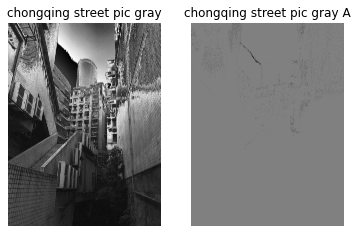

In [33]:
chongqing_gray=io.imread('img/chongqing_gray.jpg')
chongqing_A=copy.deepcopy(chongqing_gray)

for x in range(chongqing_A.shape[0]):
    for y in range(chongqing_A.shape[1]):
        chongqing_A[x,y] = pow(-1,(x+y))*chongqing_A[x,y]
        

plt.subplot(1,2,1)
plt.imshow(chongqing_gray,'gray')
plt.title('chongqing street pic gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(chongqing_A,'gray')
plt.title('chongqing street pic gray A')
plt.axis('off')
io.imsave('img/chongqing_A.jpg',chongqing_A)

        B.计算图像二维DFT

In [34]:
chongqing_gray=io.imread('img/chongqing_gray.jpg')
img_B=io.imread('img/chongqing_A.jpg')
fft2_B = np.fft.fft2(img_B)
# shift_fft2_B = np.fft.fftshift(fft2_B)

print(fft2_B)

[[ 1.55210000e+09      +0.j         -6.53733722e+04 -919710.71122952j
   1.66041894e+06 -486780.44423755j ... -5.25847493e+05 -994633.35345688j
   1.66041894e+06 +486780.44423755j -6.53733722e+04 +919710.71122952j]
 [-1.49678345e+06+5663930.51494139j -1.79733075e+06+1637629.8043742j
   4.54257216e+05-1376542.89856174j ... -1.07091158e+06 -252109.92001386j
   1.20245434e+06 -106220.54346593j -3.92449084e+05-1185723.30773188j]
 [ 8.82271998e+05+1378133.69209418j  1.71488390e+06+1290130.77671626j
   3.32617321e+05 -531488.59489606j ... -1.52914040e+06 +802308.18108083j
   7.75556024e+05 -736280.38835314j -1.26593081e+06 +495592.55053379j]
 ...
 [-1.88532830e+05 -715627.15046238j -3.01644863e+05 -739292.4184919j
   3.84753098e+05 -229146.01429142j ... -8.12242792e+05 +412576.24422273j
  -9.24498525e+04+1017008.78003583j  6.11856586e+05 +605241.77611453j]
 [ 8.82271998e+05-1378133.69209418j -1.26593081e+06 -495592.55053379j
   7.75556024e+05 +736280.38835314j ... -6.30599538e+05 +407985.183

图像的DFT变换结果，目的是体现空间变化与频域的关系：空间变化越快，频谱越宽；空间变化越慢，频谱越窄

        C.对二维DFT的值取共轭

In [35]:
shift_fft2_B_conjugate=np.conjugate(fft2_B)

print(shift_fft2_B_conjugate)

[[ 1.55210000e+09      -0.j         -6.53733722e+04 +919710.71122952j
   1.66041894e+06 +486780.44423755j ... -5.25847493e+05 +994633.35345688j
   1.66041894e+06 -486780.44423755j -6.53733722e+04 -919710.71122952j]
 [-1.49678345e+06-5663930.51494139j -1.79733075e+06-1637629.8043742j
   4.54257216e+05+1376542.89856174j ... -1.07091158e+06 +252109.92001386j
   1.20245434e+06 +106220.54346593j -3.92449084e+05+1185723.30773188j]
 [ 8.82271998e+05-1378133.69209418j  1.71488390e+06-1290130.77671626j
   3.32617321e+05 +531488.59489606j ... -1.52914040e+06 -802308.18108083j
   7.75556024e+05 +736280.38835314j -1.26593081e+06 -495592.55053379j]
 ...
 [-1.88532830e+05 +715627.15046238j -3.01644863e+05 +739292.4184919j
   3.84753098e+05 +229146.01429142j ... -8.12242792e+05 -412576.24422273j
  -9.24498525e+04-1017008.78003583j  6.11856586e+05 -605241.77611453j]
 [ 8.82271998e+05+1378133.69209418j -1.26593081e+06 +495592.55053379j
   7.75556024e+05 -736280.38835314j ... -6.30599538e+05 -407985.183

        D.对共轭后的频谱做IDFT运算

In [50]:
ifft_shift_fft2_B = np.fft.ifft2(shift_fft2_B_conjugate)

        E.对IDFT的结果取实部

In [51]:
ifft_shift_fft2_B_real=np.real(ifft_shift_fft2_B)

        F.对实部乘以(-1)(x+y)
        
        与原始图像进行对比，从理论上分析为什么会出现这种结果。

In [52]:
for x in range(ifft_shift_fft2_B_real.shape[0]):
    for y in range(ifft_shift_fft2_B_real.shape[1]):
        ifft_shift_fft2_B_real[x,y] = pow(-1,(x+y))*ifft_shift_fft2_B_real[x,y]
# plt.plot(ifft_shift_fft2_B_real)

(4032, 3024)
[[  61. -146.   99. ... -200.   61. -192.]
 [-186.   26. -220. ...   86. -175.   74.]
 [  80. -221.   60. ... -168.   81. -178.]
 ...
 [-189.  106. -129. ...   64. -181.   75.]
 [  74. -161.  123. ... -180.   86. -163.]
 [-188.  100. -156. ...   68. -179.   82.]]


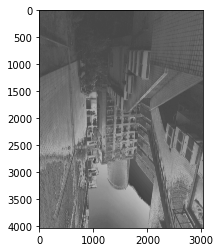

In [53]:
print(ifft_shift_fft2_B_real.shape)
print(ifft_shift_fft2_B_real)
plt.imshow(ifft_shift_fft2_B_real,'gray')

In [40]:
ifft_shift_fft2_B_real.dtype

dtype('float64')

#### 作业提示：

        （1）与DFT对应的是离散信号的周期延拓，请对图像作周期延拓，注意边缘有什么特殊情况

        （2）有限长的信号等效于无限长信号与窗函数的乘积。图像也可以看成无限大图像与窗函数的乘积，建议给图像加汉明窗代替矩形窗

#### 作业提交：

        （1）提交PDF格式的报告，包括处理前后的图像对比及相应的代码（代码直接放在文档中，不要单独打包）

        （2）对作业1要求分析DFT中水平与垂直分量的比较强的原因，比较对图像加窗后DFT的效果，说明窗函数改变DFT的原因

        （3）对作业2除给出处理效果外，要给出理论上推导证明。